In [10]:
import numpy as np
from scipy.optimize import fsolve

# -------------------------------
# Constantes (normalizadas)
# -------------------------------
I_C = 1.0        # Corriente crítica (normalizada)
Phi_0 = 1.0      # Flujo cuántico (normalizado)

# -------------------------------
# Ecuaciones del SQUID
# -------------------------------
def squid_equations(vars, Phi, I_b, beta):
    phi, dphi = vars

    f1 = 2*I_C*np.sin(phi)*np.cos(dphi) - I_b
    f2 = -dphi + 0.5*beta*np.cos(phi)*np.sin(dphi) - np.pi*Phi/Phi_0

    return [f1, f2]

# -------------------------------
# Derivada dIb/dphi (estabilidad)
# -------------------------------
def dIb_dphi(phi, dphi, beta):
    # d(dphi)/dphi a flujo constante
    num = -0.5* beta*np.sin(phi)*np.sin(dphi)
    den = 1-0.5*beta*np.cos(phi)*np.cos(dphi)
    ddphi_dphi = num/den

    return (
        2*I_C*np.cos(phi)*np.cos(dphi)
        - 2*I_C*np.sin(phi)*np.sin(dphi)*ddphi_dphi
    )

# -------------------------------
# Solver estable
# -------------------------------
def solve_squid(Phi, Ib, beta, guess):
    sols = []

    for shift in [0, np.pi]:
        try:
            sol = fsolve(
                squid_equations,
                [guess[0] + shift, guess[1]],
                args=(Phi, Ib, beta),
                xtol=1e-10,
                maxfev=2000,
            )
            phi, dphi = sol
            stability = dIb_dphi(phi, dphi, beta)

            if stability > 0:
                sols.append((phi, dphi))
        except:
            pass

    if len(sols) == 0:
        return None

    return sols[0]

# -------------------------------
# Barrido de parámetros
# -------------------------------
Phi_vals = np.linspace(-0.5, 0.5, 101)      # Φ / Φ0
Ib_vals = np.linspace(0.0, I_C, 101)

betas = [0.0, 0.1, 1.0,10]

# Resultados
results = {}

for beta in betas:
    phi_map = np.zeros((len(Phi_vals), len(Ib_vals)))
    dphi_map = np.zeros_like(phi_map)

    for i, Phi in enumerate(Phi_vals):
        guess = [0.1, -np.pi * Phi]  #intial guess

        for j, Ib in enumerate(Ib_vals):
            sol = solve_squid(Phi, Ib, beta, guess)

            if sol is not None:
                phi, dphi = sol
                phi_map[i, j] = phi
                dphi_map[i, j] = dphi
                guess = [phi, dphi]  # continuation
            else:
                phi_map[i, j] = np.nan
                dphi_map[i, j] = np.nan

    results[beta] = {
        "phi": phi_map,
        "dphi": dphi_map,
        "Phi": Phi_vals,
        "Ib": Ib_vals,
    }

print("Cálculo terminado.")


C:\Users\Debi\AppData\Local\Temp\ipykernel_19844\3544564777.py:43: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(
C:\Users\Debi\AppData\Local\Temp\ipykernel_19844\3544564777.py:43: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  sol = fsolve(


Cálculo terminado.


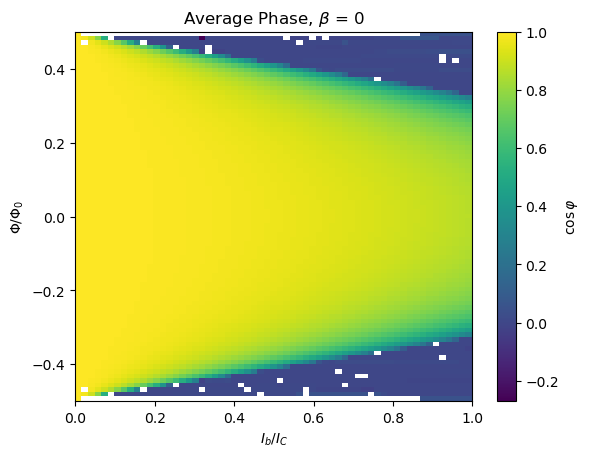

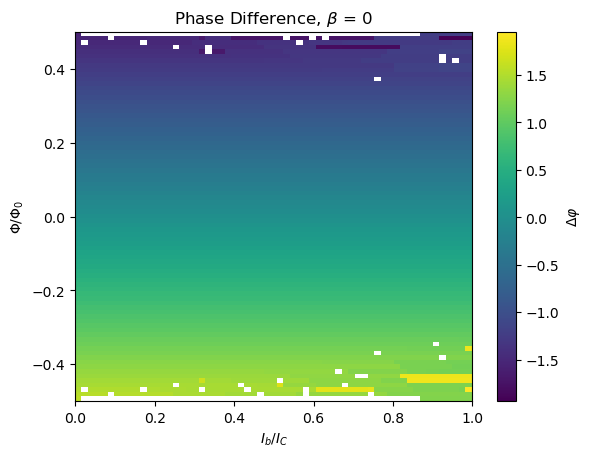

In [3]:
import matplotlib.pyplot as plt

beta = 0
data = results[beta]

plt.figure()
plt.imshow(
    np.cos(data["phi"]),
    extent=[0, I_C, -0.5, 0.5],
    aspect="auto",
    origin="lower",
)

plt.colorbar(label=r"$\cos\varphi$")
plt.xlabel(r"$I_b / I_C$")
plt.ylabel(r"$\Phi / \Phi_0$")
plt.title(rf"Average Phase, $\beta$ = {beta}")
plt.show()

plt.figure()
plt.imshow(
    data["dphi"],
    extent=[0, I_C, -0.5, 0.5],
    aspect="auto",
    origin="lower"
)

plt.colorbar(label=r"$\Delta\varphi$")
plt.xlabel(r"$I_b / I_C$")
plt.ylabel(r"$\Phi / \Phi_0$")
plt.title(rf"Phase Difference, $\beta$ = {beta}")
plt.show()


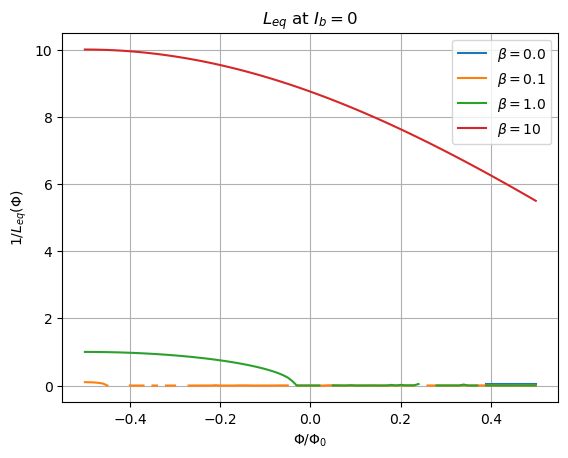

In [12]:
#Ej 4
for beta in betas:

    data = results[beta]
    L_eq_phi = []

    for ib in range(0,len(data["Ib"])):
            if data["Ib"][ib] == 0:
                for phi, dphi in zip(data["phi"][ib],data["dphi"][ib]):
                    L_eq = dIb_dphi(phi,dphi,beta)
                    L_eq_phi.append(L_eq) 
                plt.plot(data["Phi"], L_eq_phi, label=rf"$\beta = {beta}$")
                plt.xlabel(r"$\Phi / \Phi_0$")
                plt.ylabel(r"$1/L_{eq}(\Phi)$")
                plt.title(r"$L_{eq}$ at $I_b = 0$")
                plt.legend()
                plt.grid(True)

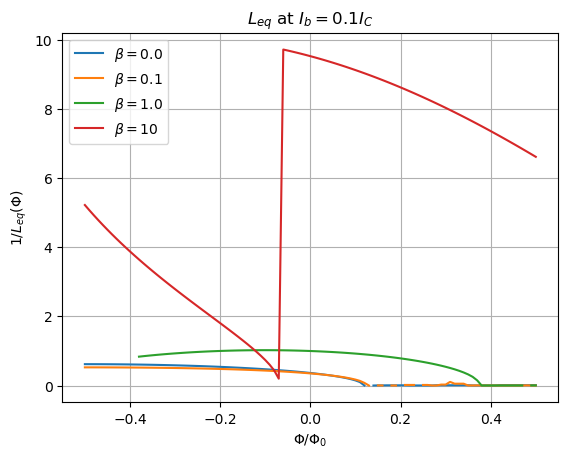

In [11]:
for beta in betas:

    data = results[beta]
    L_eq_phi = []

    for ib in range(0,len(data["Ib"])):
            if data["Ib"][ib] == 0.1:
                for phi, dphi in zip(data["phi"][ib],data["dphi"][ib]):
                    L_eq = dIb_dphi(phi,dphi,beta)
                    L_eq_phi.append(L_eq) 
                plt.plot(data["Phi"], L_eq_phi, label=rf"$\beta = {beta}$")
                plt.xlabel(r"$\Phi / \Phi_0$")
                plt.ylabel(r"$1/L_{eq}(\Phi)$")
                plt.title(r"$L_{eq}$ at $I_b = 0.1I_C$")
                plt.legend()
                plt.grid(True)

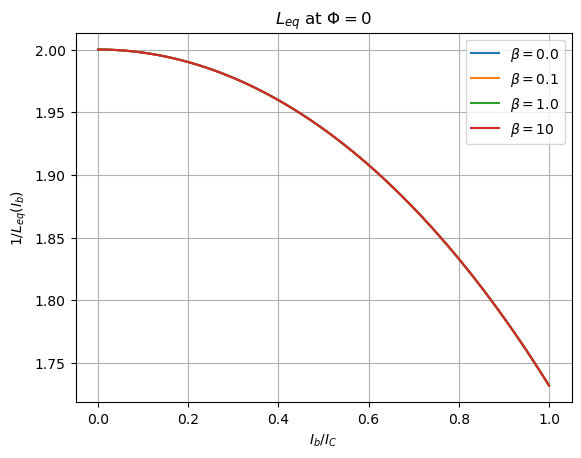

In [13]:
for beta in betas:

    data = results[beta]
    L_eq_Ib = []

    for flux in range(0,len(data["Phi"])):
            if data["Phi"][flux] == 0:
                for phi, dphi in zip(data["phi"][flux],data["dphi"][flux]):
                    L_eq = dIb_dphi(phi,dphi,beta)
                    L_eq_Ib.append(L_eq) 
                plt.plot(data["Ib"], L_eq_Ib, label=rf"$\beta = {beta}$")
                plt.xlabel(r"$I_b / I_C$")
                plt.ylabel(r"$1/L_{eq}(I_b)$")
                plt.title(r"$L_{eq}$ at $\Phi = 0$")
                plt.legend()
                plt.grid(True)

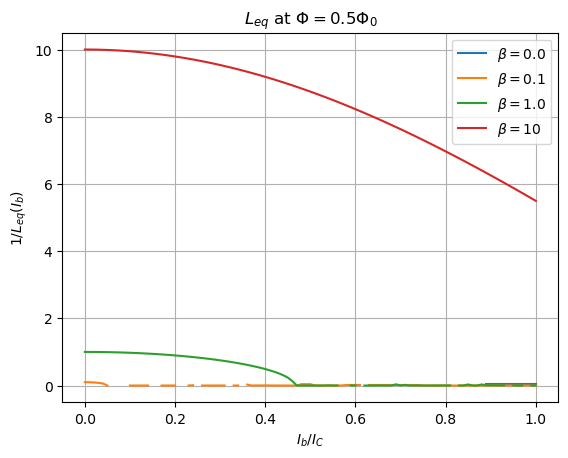

In [14]:
for beta in betas:

    data = results[beta]
    L_eq_Ib = []

    for flux in range(0,len(data["Phi"])):
            if data["Phi"][flux] == 0.5:
                for phi, dphi in zip(data["phi"][flux],data["dphi"][flux]):
                    L_eq = dIb_dphi(phi,dphi,beta)
                    L_eq_Ib.append(L_eq) 
                plt.plot(data["Ib"], L_eq_Ib, label=rf"$\beta = {beta}$")
                plt.xlabel(r"$I_b / I_C$")
                plt.ylabel(r"$1/L_{eq}(I_b)$")
                plt.title(r"$L_{eq}$ at $\Phi = 0.5\Phi_0$")
                plt.legend()
                plt.grid(True)

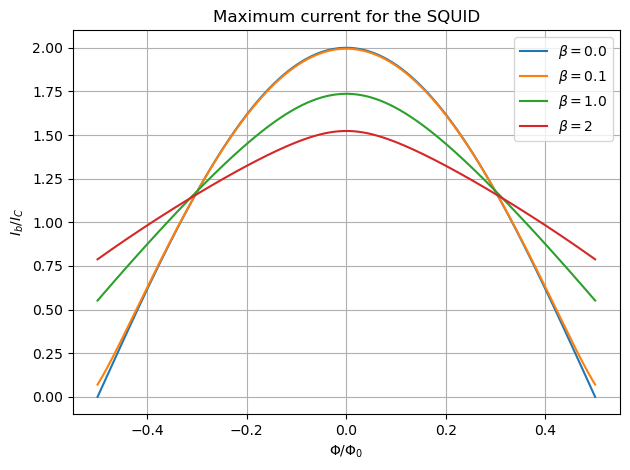

In [6]:
#Ej 5
from scipy.optimize import root

def flux_eq(dphi, Phi, beta):
    return -np.pi*Phi/Phi_0 +0.5*np.sin(dphi)*(np.cos(dphi)-np.sqrt(np.cos(dphi)**2+beta**2*np.sin(dphi)**2))-dphi

Phi_vals = np.linspace(-0.5, 0.5, 1000)

betas = [0.0, 0.1, 1.0, 2]

for beta in betas:
    delta_phi_sol = np.zeros_like(Phi_vals)

    for i, Phi_i in enumerate(Phi_vals):
        # Initial guess (caso beta = 0)
        delta_phi_init = -np.pi * Phi_i

        sol = root(
            flux_eq,
            delta_phi_init,
            args=(Phi_i, beta),
            method='hybr'
        )

        if not sol.success:
            raise RuntimeError(f"No converge para Phi = {Phi_i}")

        delta_phi_sol[i] = sol.x[0]
    
    cos_phi = (np.cos(dphi)-np.sqrt(np.cos(dphi)**2+beta**2*np.sin(dphi)**2))/(beta+1e-10) #1e-10 to avoid division by 0
    Ib = 2*I_C*np.cos(delta_phi_sol)*np.sqrt(1-cos_phi**2)
        
    plt.plot(Phi_vals, Ib, label=rf"$\beta = {beta}$")
    plt.xlabel(r'$\Phi/\Phi_0$')
    plt.ylabel(r'$I_b/I_C$')
    plt.title(r'Maximum current for the SQUID')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    